In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of the ReLU function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# One-hot encoding for output labels
encoder = OneHotEncoder(sparse=False)
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
encoded_y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# Training function
def train_neural_network(X_train, y_train, hidden_weights, hidden_bias, output_weights, output_bias, lr, epochs):
    for _ in range(epochs):
        # Forward Propagation
        hidden_layer_activation = np.dot(X_train, hidden_weights)
        hidden_layer_activation += hidden_bias
        hidden_layer_output = relu(hidden_layer_activation)

        output_layer_activation = np.dot(hidden_layer_output, output_weights)
        output_layer_activation += output_bias
        predicted_output = relu(output_layer_activation)

        # Backpropagation
        error = y_train - predicted_output
        d_predicted_output = error * relu_derivative(predicted_output)
        
        error_hidden_layer = d_predicted_output.dot(output_weights.T)
        d_hidden_layer = error_hidden_layer * relu_derivative(hidden_layer_output)

        # Updating Weights and Biases
        output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr
        hidden_weights += X_train.T.dot(d_hidden_layer) * lr
        hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

    return hidden_weights, hidden_bias, output_weights, output_bias, predicted_output

# Initialize weights and biases
inputLayer_neurons = X_train.shape[1] # number of features in dataset
hiddenLayer_neurons = 10 # number of hidden layers neurons
outputLayer_neurons = y_train.shape[1] # number of neurons at output layer

# Weight and bias initialization
hidden_weights = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
hidden_bias = np.random.uniform(size=(1, hiddenLayer_neurons))
output_weights = np.random.uniform(size=(hiddenLayer_neurons, outputLayer_neurons))
output_bias = np.random.uniform(size=(1, outputLayer_neurons))

# Learning rate and epochs
lr = 0.01
epochs = 10000

# Train the neural network
hidden_weights, hidden_bias, output_weights, output_bias, predicted_output = train_neural_network(X_train, y_train, hidden_weights, hidden_bias, output_weights, output_bias, lr, epochs)

# Evaluate the model on the test set
hidden_layer_activation = np.dot(X_test, hidden_weights)
hidden_layer_activation += hidden_bias
hidden_layer_output = relu(hidden_layer_activation)

output_layer_activation = np.dot(hidden_layer_output, output_weights)
output_layer_activation += output_bias
predicted_output_test = relu(output_layer_activation)

# Convert predicted outputs to label indices
predicted_labels = np.argmax(predicted_output_test, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print(f"Accuracy on the test set: {accuracy:.2f}")


D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy on the test set: 0.33


In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of the ReLU function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
# Evaluation function
def evaluate_neural_network(X_test, y_test, weights, biases):
    hidden_weights1, hidden_weights2, hidden_weights3, output_weights = weights
    hidden_bias1, hidden_bias2, hidden_bias3, output_bias = biases
    
    # Forward propagation on the test set
    hidden_layer_activation1 = np.dot(X_test, hidden_weights1)
    hidden_layer_activation1 += hidden_bias1
    hidden_layer_output1 = relu(hidden_layer_activation1)

    hidden_layer_activation2 = np.dot(hidden_layer_output1, hidden_weights2)
    hidden_layer_activation2 += hidden_bias2
    hidden_layer_output2 = relu(hidden_layer_activation2)

    hidden_layer_activation3 = np.dot(hidden_layer_output2, hidden_weights3)
    hidden_layer_activation3 += hidden_bias3
    hidden_layer_output3 = relu(hidden_layer_activation3)

    output_layer_activation = np.dot(hidden_layer_output3, output_weights)
    output_layer_activation += output_bias
    predicted_output_test = relu(output_layer_activation)

    # Convert predicted outputs to label indices
    predicted_labels = np.argmax(predicted_output_test, axis=1)
    true_labels = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = np.mean(predicted_labels == true_labels)
    return accuracy

# One-hot encoding for output labels
encoder = OneHotEncoder(sparse=False)
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)
encoded_y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# Training function
def train_neural_network(X_train, y_train, weights, biases, lr, epochs):
    hidden_weights1, hidden_weights2, hidden_weights3, output_weights = weights
    hidden_bias1, hidden_bias2, hidden_bias3, output_bias = biases
    
    for _ in range(epochs):
        # Forward Propagation
        hidden_layer_activation1 = np.dot(X_train, hidden_weights1)
        hidden_layer_activation1 += hidden_bias1
        hidden_layer_output1 = relu(hidden_layer_activation1)

        hidden_layer_activation2 = np.dot(hidden_layer_output1, hidden_weights2)
        hidden_layer_activation2 += hidden_bias2
        hidden_layer_output2 = relu(hidden_layer_activation2)

        hidden_layer_activation3 = np.dot(hidden_layer_output2, hidden_weights3)
        hidden_layer_activation3 += hidden_bias3
        hidden_layer_output3 = relu(hidden_layer_activation3)

        output_layer_activation = np.dot(hidden_layer_output3, output_weights)
        output_layer_activation += output_bias
        predicted_output = relu(output_layer_activation)

        # Backpropagation
        error = y_train - predicted_output
        d_predicted_output = error * relu_derivative(predicted_output)
        
        error_hidden_layer3 = d_predicted_output.dot(output_weights.T)
        d_hidden_layer3 = error_hidden_layer3 * relu_derivative(hidden_layer_output3)

        error_hidden_layer2 = d_hidden_layer3.dot(hidden_weights3.T)
        d_hidden_layer2 = error_hidden_layer2 * relu_derivative(hidden_layer_output2)

        error_hidden_layer1 = d_hidden_layer2.dot(hidden_weights2.T)
        d_hidden_layer1 = error_hidden_layer1 * relu_derivative(hidden_layer_output1)

        # Updating Weights and Biases
        output_weights += hidden_layer_output3.T.dot(d_predicted_output) * lr
        output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * lr

        hidden_weights3 += hidden_layer_output2.T.dot(d_hidden_layer3) * lr
        hidden_bias3 += np.sum(d_hidden_layer3, axis=0, keepdims=True) * lr

        hidden_weights2 += hidden_layer_output1.T.dot(d_hidden_layer2) * lr
        hidden_bias2 += np.sum(d_hidden_layer2, axis=0, keepdims=True) * lr

        hidden_weights1 += X_train.T.dot(d_hidden_layer1) * lr
        hidden_bias1 += np.sum(d_hidden_layer1, axis=0, keepdims=True) * lr

    return (hidden_weights1, hidden_weights2, hidden_weights3, output_weights), (hidden_bias1, hidden_bias2, hidden_bias3, output_bias), predicted_output

# Initialize weights and biases for 3 hidden layers
inputLayer_neurons = X_train.shape[1] # number of features in dataset
hiddenLayer_neurons1 = 10 # number of neurons in first hidden layer
hiddenLayer_neurons2 = 8 # number of neurons in second hidden layer
hiddenLayer_neurons3 = 6 # number of neurons in third hidden layer
outputLayer_neurons = y_train.shape[1] # number of neurons at output layer

# Weight and bias initialization for 3 hidden layers
hidden_weights1 = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons1))
hidden_bias1 = np.random.uniform(size=(1, hiddenLayer_neurons1))
hidden_weights2 = np.random.uniform(size=(hiddenLayer_neurons1, hiddenLayer_neurons2))
hidden_bias2 = np.random.uniform(size=(1, hiddenLayer_neurons2))
hidden_weights3 = np.random.uniform(size=(hiddenLayer_neurons2, hiddenLayer_neurons3))
hidden_bias3 = np.random.uniform(size=(1, hiddenLayer_neurons3))
output_weights = np.random.uniform(size=(hiddenLayer_neurons3, outputLayer_neurons))
output_bias = np.random.uniform(size=(1, outputLayer_neurons))

# Learning rate and epochs
lr = 0.01
epochs = 10000

# Train the neural network
weights = (hidden_weights1, hidden_weights2, hidden_weights3, output_weights)
biases = (hidden_bias1, hidden_bias2, hidden_bias3, output_bias)
weights, biases, predicted_output = train_neural_network(X_train, y_train, weights, biases, lr, epochs)

# Evaluate the model on the test set
accuracy = evaluate_neural_network(X_test, y_test, weights, biases)
print(f"Accuracy on the test set: {accuracy:.2f}")




D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy on the test set: 0.33


NameError: name 'plt' is not defined

D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
12/12 [==============================] - 2s 41ms/step - loss: 1.5490 - accuracy: 0.3250 - val_loss: 1.3434 - val_accuracy: 0.3667
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.3275 - accuracy: 0.3250 - val_loss: 1.2110 - val_accuracy: 0.3667
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 1.2175 - accuracy: 0.1500 - val_loss: 1.1361 - val_accuracy: 0.1000
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 1.1291 - accuracy: 0.0833 - val_loss: 1.0760 - val_accuracy: 0.2667
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 1.0632 - accuracy: 0.3583 - val_loss: 1.0033 - val_accuracy: 0.6000
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9964 - accuracy: 0.6500 - val_loss: 0.9361 - val_accuracy: 0.7000
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9348 - accuracy: 0.6583 - val_loss: 0.8885 - val_accuracy: 0.7000
Epoch 8/100


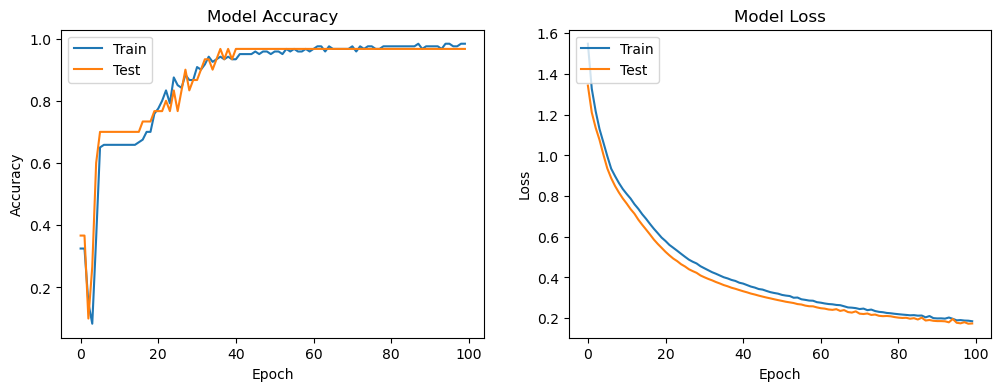

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding for output labels
encoder = OneHotEncoder(sparse=False)
encoded_y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# Define the Keras model with three hidden layers
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu')) # First hidden layer
model.add(Dense(8, activation='relu')) # Second hidden layer
model.add(Dense(6, activation='relu')) # Third hidden layer
model.add(Dense(y_train.shape[1], activation='softmax')) # Output layer

# Compile the model
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test set accuracy: {accuracy:.2f}")

# Plot the training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
12/12 [==============================] - 1s 24ms/step - loss: 1.1922 - accuracy: 0.4250 - val_loss: 1.0754 - val_accuracy: 0.7000
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0549 - accuracy: 0.6583 - val_loss: 0.9639 - val_accuracy: 0.7000
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9581 - accuracy: 0.6583 - val_loss: 0.8983 - val_accuracy: 0.7000
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8944 - accuracy: 0.6583 - val_loss: 0.8377 - val_accuracy: 0.7000
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8487 - accuracy: 0.6583 - val_loss: 0.8133 - val_accuracy: 0.7000
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8281 - accuracy: 0.6583 - val_loss: 0.7929 - val_accuracy: 0.7000
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8049 - accuracy: 0.6583 - val_loss: 0.7701 - val_accuracy: 0.7000
Epoch 8/100


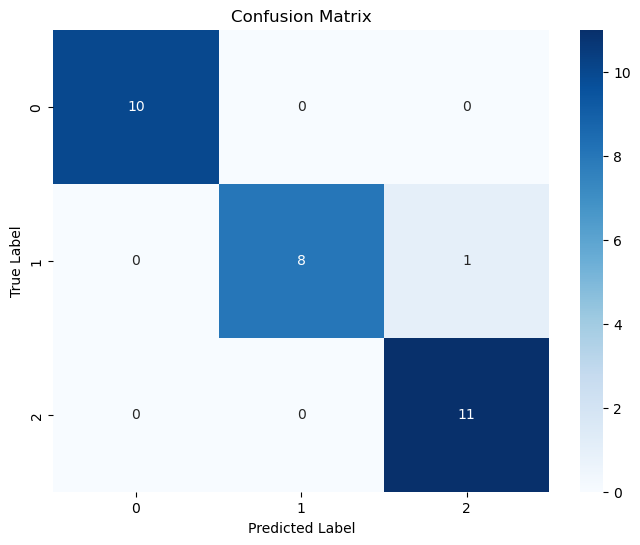

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding for output labels
encoder = OneHotEncoder(sparse=False)
encoded_y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# Define the Keras model with three hidden layers
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu')) # First hidden layer
model.add(Dense(8, activation='relu')) # Second hidden layer
model.add(Dense(6, activation='relu')) # Third hidden layer
model.add(Dense(y_train.shape[1], activation='softmax')) # Output layer

# Compile the model
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test set accuracy: {accuracy:.2f}")

# Predict the test set results
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the training history (same as before)


D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
12/12 [==============================] - 2s 32ms/step - loss: 3.3277 - accuracy: 0.3333 - val_loss: 2.8270 - val_accuracy: 0.3333
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 2.3803 - accuracy: 0.3333 - val_loss: 1.9352 - val_accuracy: 0.3333
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 1.6442 - accuracy: 0.3083 - val_loss: 1.3971 - val_accuracy: 0.3000
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 1.2850 - accuracy: 0.1167 - val_loss: 1.1485 - val_accuracy: 0.3000
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1393 - accuracy: 0.3250 - val_loss: 1.0620 - val_accuracy: 0.3667
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0769 - accuracy: 0.3250 - val_loss: 1.0173 - val_accuracy: 0.3667
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0336 - accuracy: 0.3250 - val_loss: 0.9801 - val_accuracy: 0.3667
Epoch 8/100


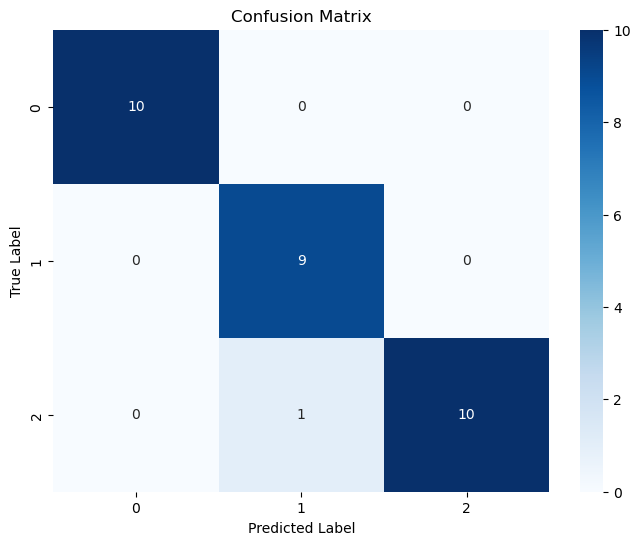

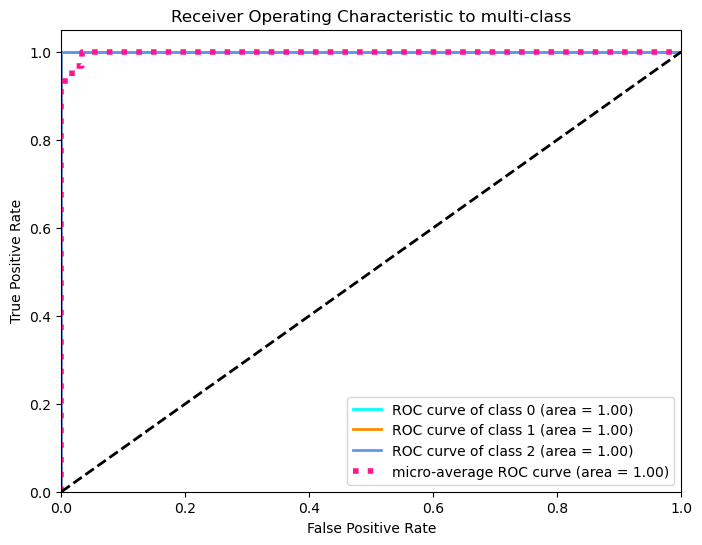

In [9]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from scipy import interp
from itertools import cycle
import seaborn as sns

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding for output labels
encoder = OneHotEncoder(sparse=False)
encoded_y = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.2, random_state=42)

# Define the Keras model with three hidden layers
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu')) # First hidden layer
model.add(Dense(8, activation='relu')) # Second hidden layer
model.add(Dense(6, activation='relu')) # Third hidden layer
model.add(Dense(y_train.shape[1], activation='softmax')) # Output layer

# Compile the model
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test set accuracy: {accuracy:.2f}")

# Predict the test set results
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Compute ROC curve and ROC area for each class
n_classes = y_train.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# Plot ROC curve for a random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=lw)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

